In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from operator import add
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [4]:
#loading of the data
data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [6]:
#data Preprocessing
#missing values
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 15.21%


In [7]:
data.dropna(axis=0, inplace=True)
data.shape

(3658, 16)

In [8]:
# Handle missing values with SimpleImputer

imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

# Standardize numeric features with StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Replace NaN values with the mean value of the column
data = data.fillna(data.mean())

In [9]:
#Explorotary Data Analysis
# Basic descriptive statistics
print(data.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  3658.000000  3658.000000  3658.000000    3658.000000  3658.000000   
mean      0.443685    49.551941     1.980317       0.489065     9.025424   
std       0.496886     8.562029     1.022656       0.499949    11.921590   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  3658.000000      3658.000000   3658.000000  3658.000000  3658.000000   
mean      0.030344         0.005741      0.311646     0.027064   236.847731   
std       0.171557         0.075561      0.463229     0.162292    44.097681   

Text(0.5, 1.0, 'Agewise distribution of the patients')

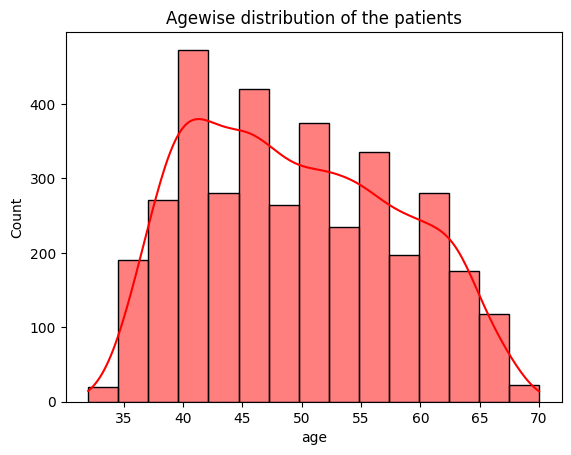

In [10]:
sns.histplot(data['age'], bins=15, kde=True, color='red')
plt.ylabel('Count')
plt.title('Agewise distribution of the patients')

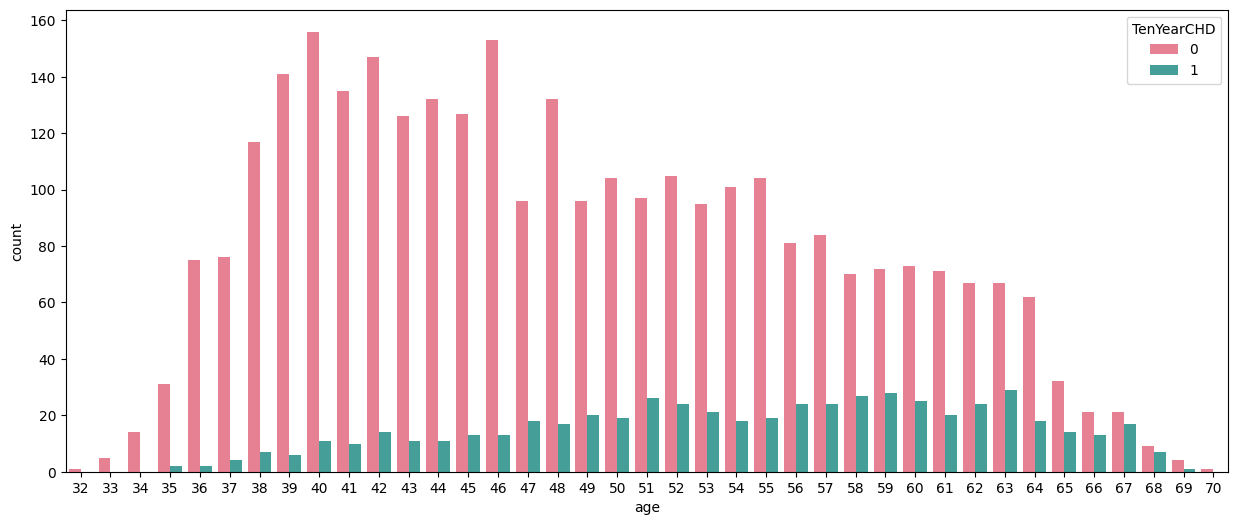

In [11]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = data, hue = 'TenYearCHD',palette='husl')
plt.show()

Text(0.5, 1.0, 'Distribution of HeartRate')

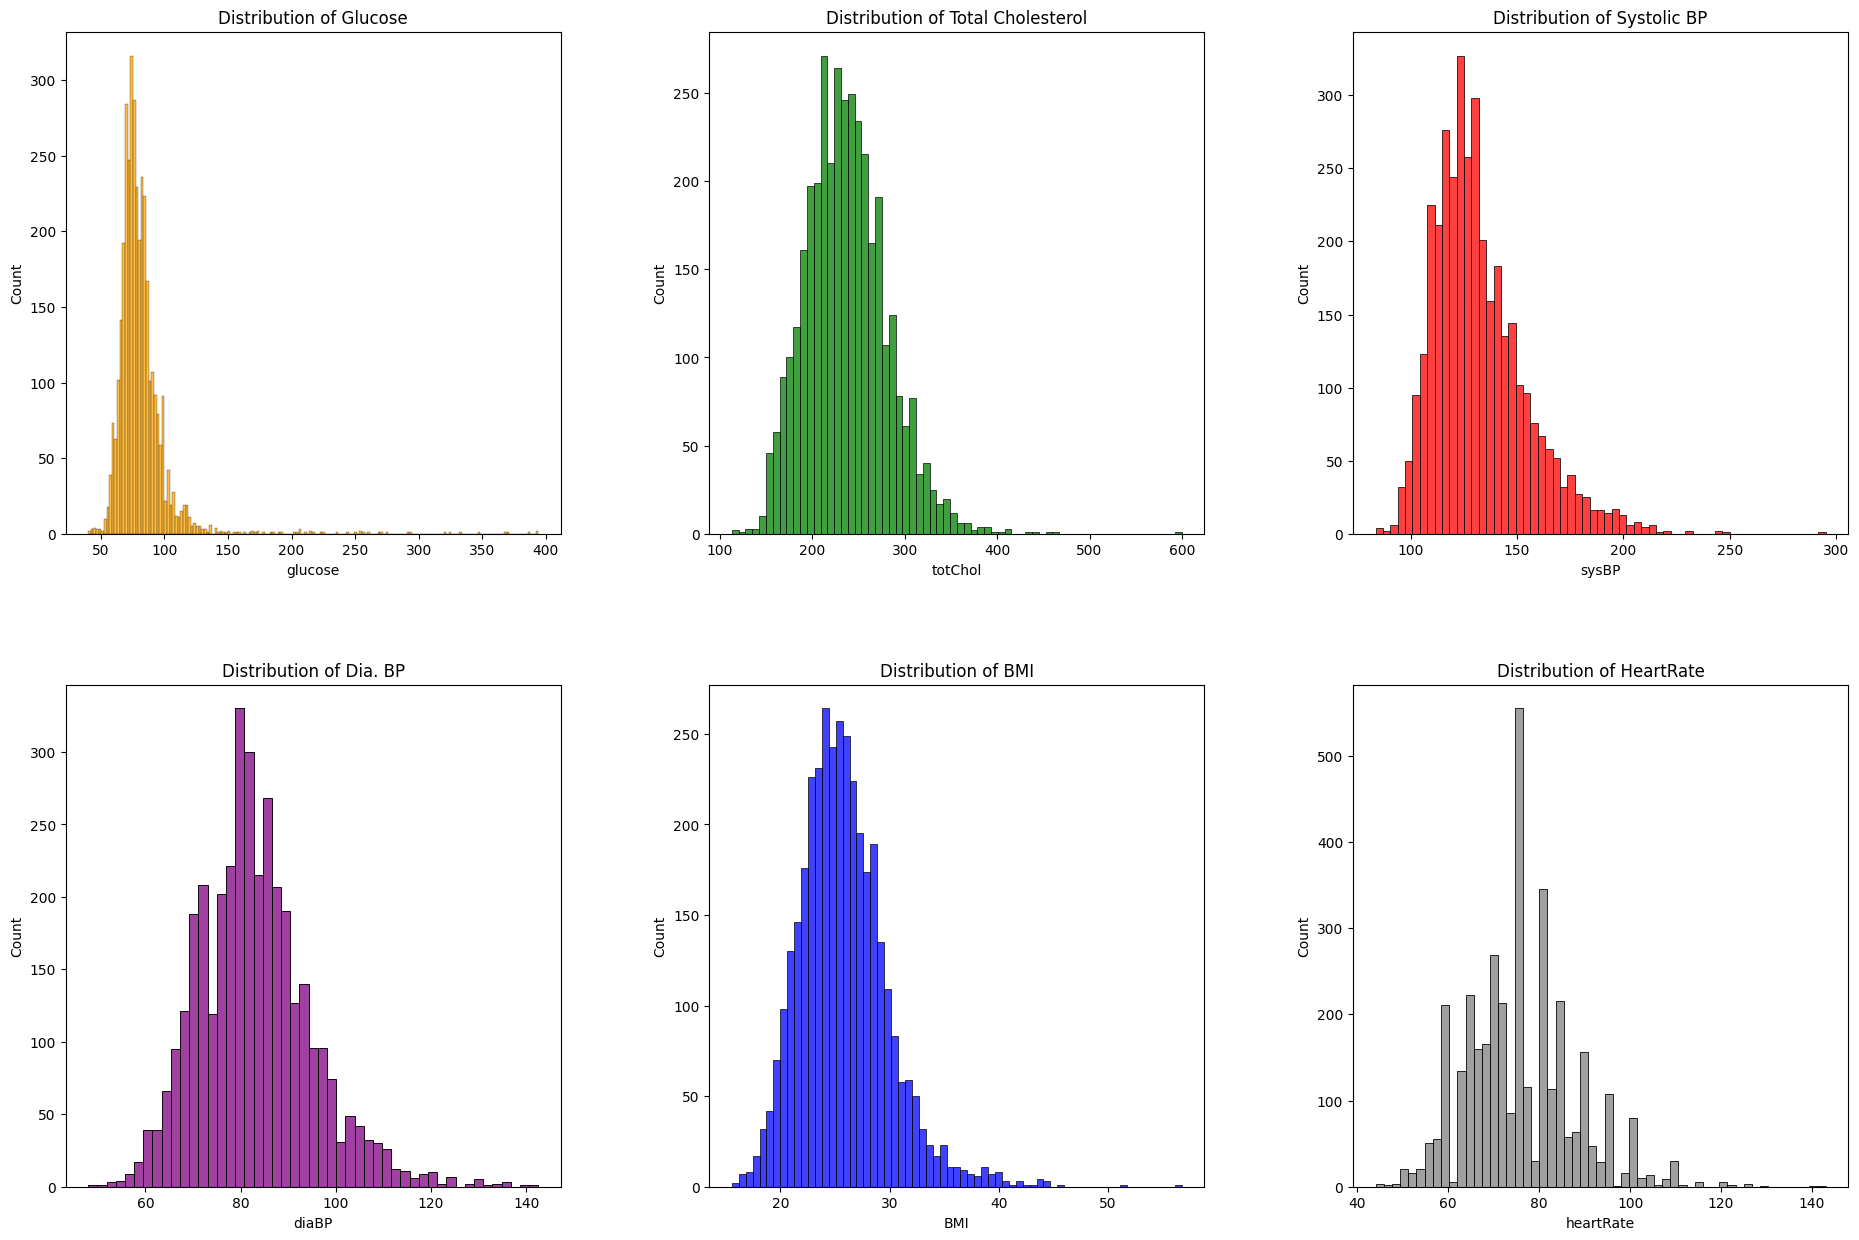

In [12]:
#Distribution of Continuous variables

plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.histplot(data['glucose'] , color='orange')
plt.title('Distribution of Glucose')

plt.subplot(2, 3, 2)
sns.histplot(data['totChol'], color='g')
plt.title('Distribution of Total Cholesterol')

plt.subplot(2, 3, 3)
sns.histplot(data['sysBP'], color='r')
plt.title('Distribution of Systolic BP')

plt.subplot(2, 3, 4)
sns.histplot(data['diaBP'] , color='purple')
plt.title('Distribution of Dia. BP')

plt.subplot(2, 3, 5)
sns.histplot(data['BMI'], color='blue')
plt.title('Distribution of BMI')

plt.subplot(2, 3, 6)
sns.histplot(data['heartRate'], color='grey')
plt.title('Distribution of HeartRate')

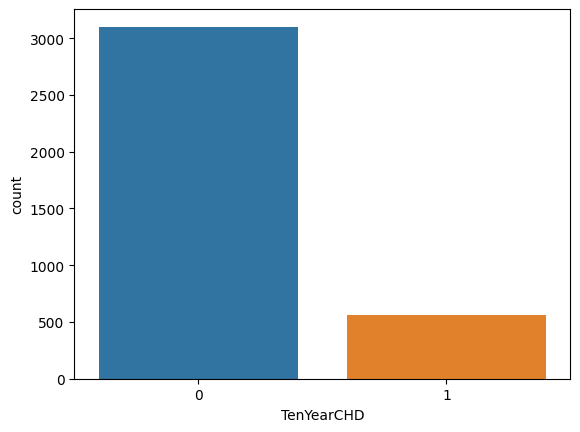

There are 3101 patients without heart disease and 557 patients with the disease


In [13]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

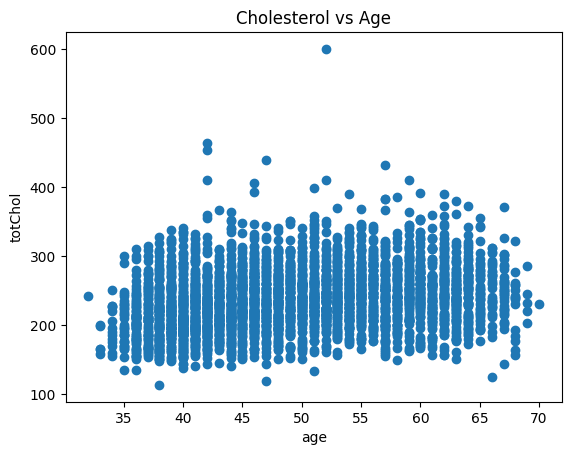

In [15]:
# Create a scatter plot of cholesterol vs age
plt.scatter(data['age'], data['totChol'])
plt.title('Cholesterol vs Age')
plt.xlabel('age')
plt.ylabel('totChol')
plt.show()

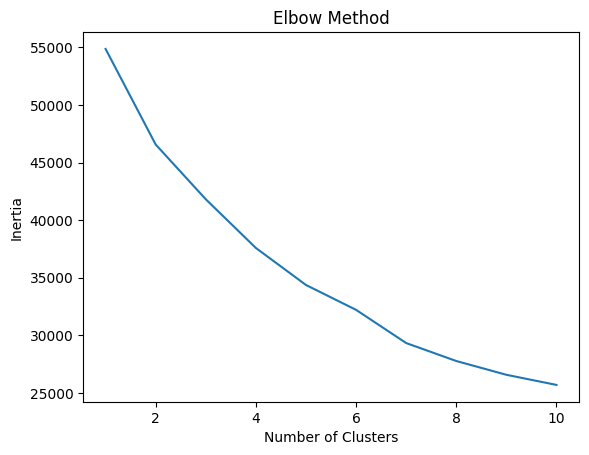

In [13]:
#Clustering Analysis
#k means Clustering

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Select the features for clustering analysis
features = ['age', 'male', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
            'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP',
            'BMI', 'heartRate', 'glucose']


# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[features])

# Standardize numeric features with StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualize the elbow method to determine the optimal number of clusters

plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()





1    2485
0    1173
Name: cluster, dtype: int64


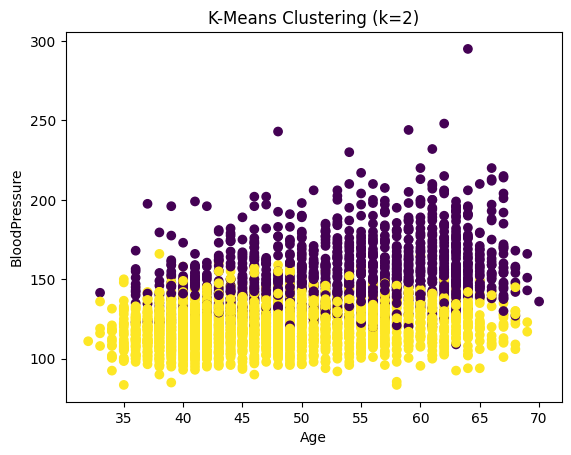

In [14]:
# Separate the target variable
X = data.drop('TenYearCHD', axis=1)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_scaled)

# Get the cluster labels
labels = kmeans.labels_

# Add cluster labels to the dataset
data['cluster'] = kmeans.labels_

# Check the size of each cluster
print(data['cluster'].value_counts())

# Visualize the clusters using a scatter plot
import matplotlib.pyplot as plt
plt.scatter(data['age'], data['sysBP'], c=data['cluster'])
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.title('K-Means Clustering (k=2)')
plt.show()

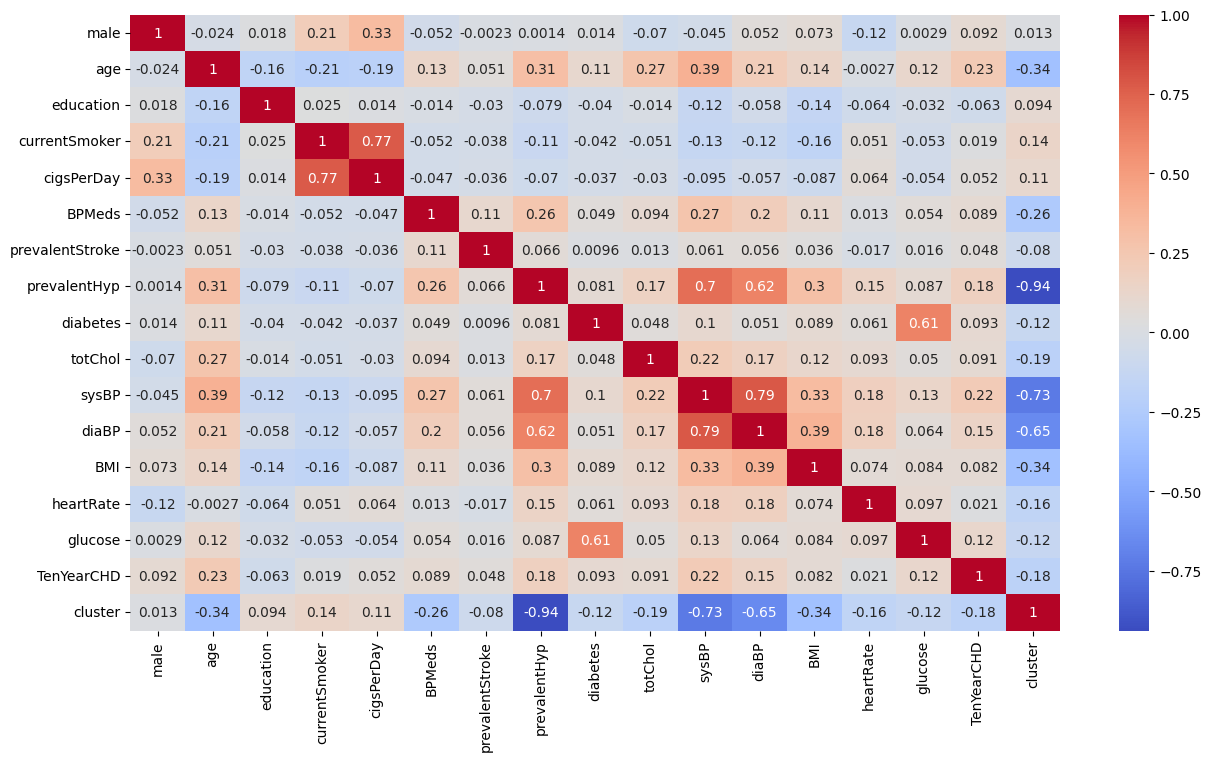

In [15]:
#feature Selection
#Corelation Analysis
# Compute correlation matrix
corr_matrix = data.corr()

# Set the figure size
plt.figure(figsize=(15, 8))

# Visualize correlation matrix using heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Select features with high correlation with target variable (TenYearCHD)
selected_features = corr_matrix['TenYearCHD'][abs(corr_matrix['TenYearCHD']) > 0.1].index.tolist()

# Remove target variable from list of selected features
selected_features.remove('TenYearCHD')

# Select subset of data with selected features
data_selected = data[selected_features]

In [16]:
correlation=data.corr()
print(correlation['TenYearCHD'].sort_values(ascending=False))

TenYearCHD         1.000000
age                0.233983
sysBP              0.222821
prevalentHyp       0.181387
diaBP              0.150124
glucose            0.121990
diabetes           0.093431
male               0.091688
totChol            0.091338
BPMeds             0.089152
BMI                0.082055
cigsPerDay         0.052014
prevalentStroke    0.048366
heartRate          0.020514
currentSmoker      0.019165
education         -0.063279
cluster           -0.184851
Name: TenYearCHD, dtype: float64


In [17]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# split into features and target variable
X = data.drop(['TenYearCHD'], axis=1)
y = data['TenYearCHD']

# perform feature selection using SelectKBest with f_classif scoring function
k = 2 # number of top features to select
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X, y)

# get selected feature names
selected_features = X.columns[selector.get_support()]

# print the selected feature names
print("Selected features:", selected_features)

Selected features: Index(['age', 'sysBP'], dtype='object')


In [18]:
#Model Selection

#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split the preprocessed and selected feature data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# create a logistic regression model object
logreg = LogisticRegression(random_state=42)

# train the logistic regression model on the training set
logreg.fit(X_train, y_train)

# test the logistic regression model on the testing set
y_pred = logreg.predict(X_test)

# evaluate the performance of the logistic regression model using accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", accuracy)


Logistic Regression Accuracy: 0.8346994535519126


In [19]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split the preprocessed and selected feature data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Create the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rfc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rfc.predict(X_test)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy)


Random Forest Accuracy: 0.76775956284153


In [20]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# split the preprocessed and selected feature data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt.fit(X_train, y_train)

# Predict the target values using the trained model
y_pred = dt.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)


Decision Tree Accuracy: 0.7691256830601093


In [21]:
#Model Evaluation of Selected Model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# define logistic regression model
lr = LogisticRegression()

# define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

# define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# perform grid search with cross-validation
grid_search = GridSearchCV(lr, param_grid, scoring='accuracy', cv=cv)
grid_search.fit(X_train, y_train)

# evaluate the best model on the test set
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1-score:", f1)


Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.8346994535519126
Precision: 0.6
Recall: 0.02459016393442623
F1-score: 0.04724409448818897


In [22]:
# create a new data to predict its risk of getting heart disease after ten years
new_data = np.array([[23,120.0]])

# make a prediction on the new data point
prediction = logreg.predict_proba(new_data)[0,1]

# print the predicted risk of getting heart disease after ten years
print("The predicted risk of getting heart disease after ten years is:", round(prediction*100, 2), "%")

The predicted risk of getting heart disease after ten years is: 2.08 %
